* Attributes Description

Variable | Description
--------------|-----------
Variable |	Definition
ID |	Unique ID
Gender|	Gender of the customer
Ever_Married	|Marital status of the customer
Age	|Age of the customer
Graduated|	Is the customer a graduate?
Profession|	Profession of the customer
Work_Experience	|Work Experience in years
Spending_Score|	Spending score of the customer
Family_Size|	Number of family members for the customer (including the customer)
Var_1	|Anonymised Category for the customer

* Based on the attributes group Segment of the customer

* Context

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

---------------------------------------------------------

* Content

In their existing market, the sales team has to classify all customers into different number of segments. Then, they can perform segmented outreach and communication for different segment of customers. 

### Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Train_customer.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


### Data Wrangling

In [3]:
# Geeting to know about the data types and other relavant information from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9125 non-null   int64  
 1   Gender           9125 non-null   object 
 2   Ever_Married     8970 non-null   object 
 3   Age              9125 non-null   int64  
 4   Graduated        9041 non-null   object 
 5   Profession       8982 non-null   object 
 6   Work_Experience  8170 non-null   float64
 7   Spending_Score   9125 non-null   object 
 8   Family_Size      8733 non-null   float64
 9   Var_1            9034 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 713.0+ KB


In [4]:
# Basic Cleaning by dropping the ID column
df = data.drop(['ID'], axis = 1)

In [5]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x]== 'object':
        cat_col.append(x)
    
    
for x in cat_col:
    print(x)
    print("-----------------")
    print(df[x].value_counts())
    print('-----------------')
 

Gender
-----------------
Male      5003
Female    4122
Name: Gender, dtype: int64
-----------------
Ever_Married
-----------------
Yes    5213
No     3757
Name: Ever_Married, dtype: int64
-----------------
Graduated
-----------------
Yes    5642
No     3399
Name: Graduated, dtype: int64
-----------------
Profession
-----------------
Artist           2854
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64
-----------------
Spending_Score
-----------------
Low        5563
Average    2193
High       1369
Name: Spending_Score, dtype: int64
-----------------
Var_1
-----------------
Cat_6    5938
Cat_4    1190
Cat_3     963
Cat_2     469
Cat_7     232
Cat_1     147
Cat_5      95
Name: Var_1, dtype: int64
-----------------


In [6]:
# Check the unique values in dataset
df.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
dtype: int64

In [7]:
# Statistical Discription of Numerical Variables
df.describe()

,Age,Work_Experience,Family_Size
count,9125.000000,8170.000000,8733.000000
mean,43.566795,2.635618,2.841292
std,16.798711,3.405982,1.535801
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


## Missing Values Treatment

If the missing data is Present in -
* Continuous variable feature - Fill Median or mean based on the distriution of feature variale
* Categorical Variable feature - Fill mode of the column in place of missing data

<AxesSubplot:>

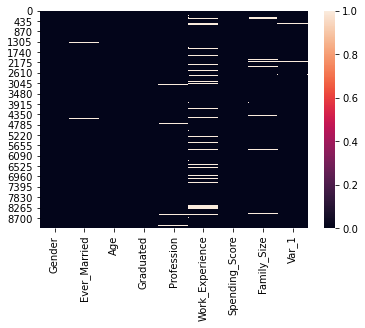

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Gender               0
Ever_Married       155
Age                  0
Graduated           84
Profession         143
Work_Experience    955
Spending_Score       0
Family_Size        392
Var_1               91
dtype: int64

In [10]:
df['Work_Experience'].mode()

0    1.0
dtype: float64

<AxesSubplot:xlabel='Work_Experience', ylabel='Density'>

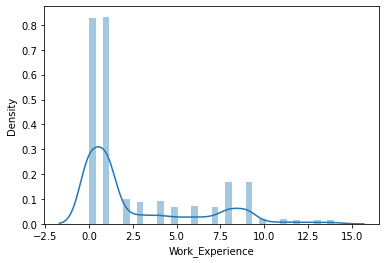

In [11]:
sns.distplot(df['Work_Experience'])

In [12]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated']= df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Work_Experience']= df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])
df['Family_Size']= df['Family_Size'].fillna(df['Family_Size'].mode()[0])
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])

<AxesSubplot:>

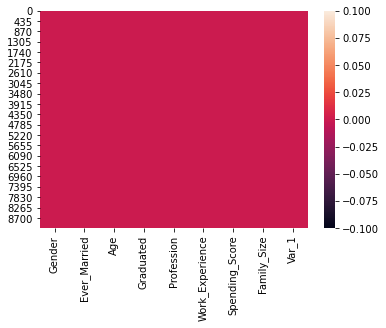

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9125 non-null   object 
 1   Ever_Married     9125 non-null   object 
 2   Age              9125 non-null   int64  
 3   Graduated        9125 non-null   object 
 4   Profession       9125 non-null   object 
 5   Work_Experience  9125 non-null   float64
 6   Spending_Score   9125 non-null   object 
 7   Family_Size      9125 non-null   float64
 8   Var_1            9125 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 641.7+ KB


**Datatypes of Attributes**

* 2 Variable - Numerical (Work Experience & Age)
* Remaining Variable - Categorical


## Exploratory Data Analysis

**1. Variable Identification**
* Categorical 
     - Ordinal
     - Nominal
* Continuous 
-----------------------------------
**2. Univariate Analysis**
* For Categorical Variable - 
    - Count of data present in the dataset for particular variable
* For Continuous Variable - 
    - Find the Distribution of feature using Histogram
    - Outlier detection using Box Plot
------------------------
**3. Bi-Variate Analysis**
* Categorical - Continuous Variables ---> Bar Graph
* Continuous - Continuous Variables ---> Scatter Plot to see relationship
--------------------------------------------
**4. Outlier Detection**
* Box plot are the best statistical Measure for Outlier detection

**5. Missing value Treatment**
* Depending upon the dataset the missing value treatment can be done before EDA or after EDA process


### Univariate analysis

In [15]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


<AxesSubplot:xlabel='Gender', ylabel='count'>

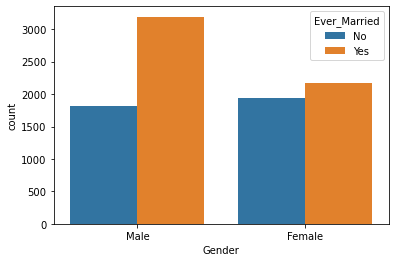

In [16]:
sns.countplot(df['Gender'], hue = df['Ever_Married'])

<AxesSubplot:xlabel='Profession', ylabel='count'>

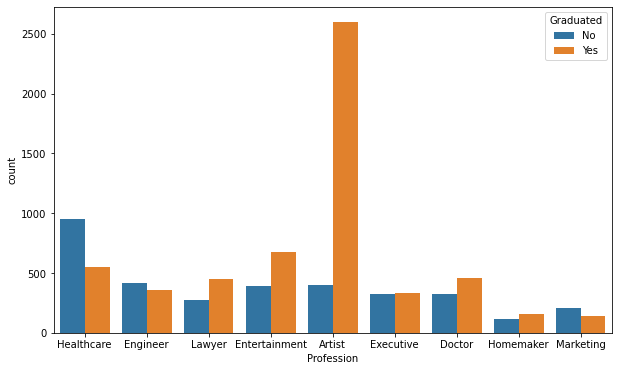

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(df['Profession'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

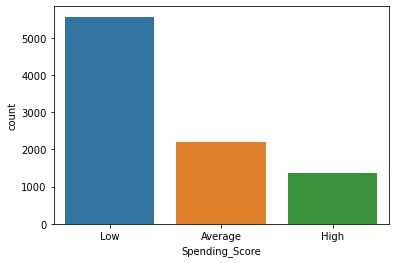

In [18]:
sns.countplot(df['Spending_Score'])

Pie plot of Profession
------------------------------------------------------------



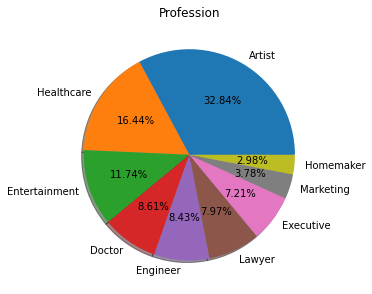

In [19]:
# Profession

print("Pie plot of Profession")
print('------------------------------------------------------------\n')


plt.subplot(1,1,1)  
label = df['Profession'].value_counts().index
value = df['Profession'].value_counts().values
plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=None)
plt.title("Profession")

plt.tight_layout(pad=0.4)

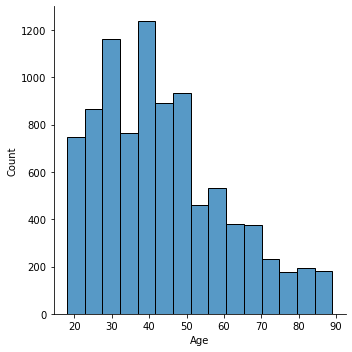

In [20]:
sns.displot(df['Age'], bins = 15)

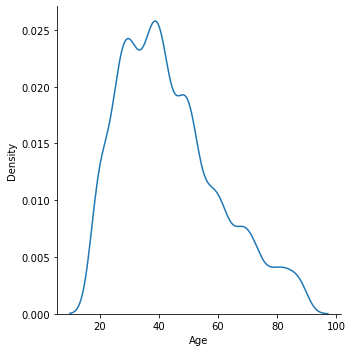

In [21]:
sns.displot(df['Age'], kind ='kde')

<AxesSubplot:xlabel='Age'>

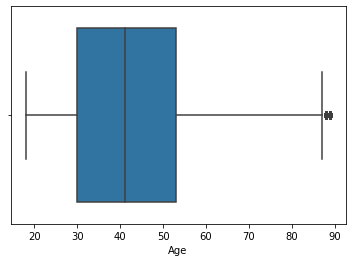

In [22]:
sns.boxplot(df['Age'])

* We can see from the distribution as well as box plot that there are not much outliers which needs attention

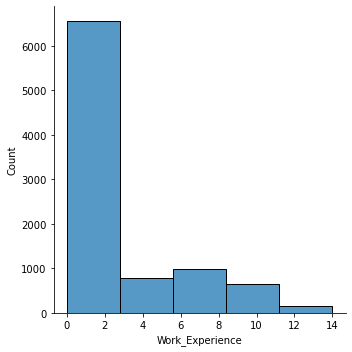

In [23]:
sns.displot(df['Work_Experience'], bins = 5)

### Bivariate Analysis

In [24]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


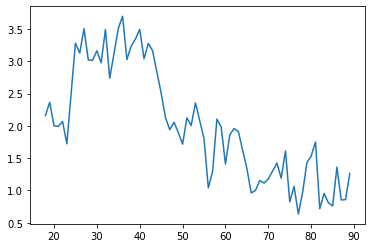

In [25]:
a  = df.groupby('Age').Work_Experience.mean()
plt.plot(a)

<AxesSubplot:>

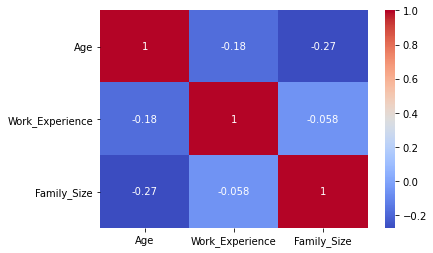

In [26]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

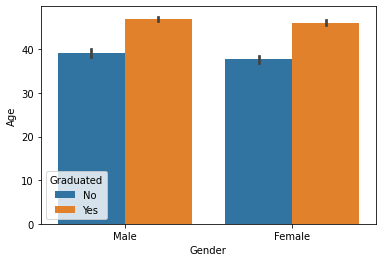

In [27]:
sns.barplot(x= df['Gender'], y = df['Age'], hue = df['Graduated'])

<AxesSubplot:xlabel='Gender', ylabel='Work_Experience'>

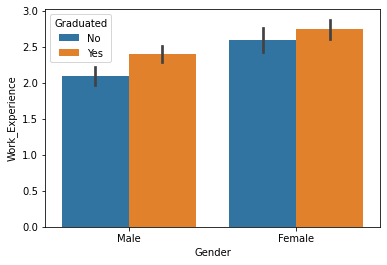

In [28]:
sns.barplot(x= df['Gender'], y = df['Work_Experience'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Family_Size'>

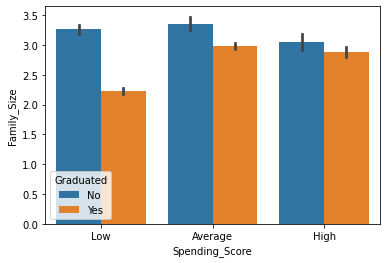

In [29]:
sns.barplot(x= df['Spending_Score'], y = df['Family_Size'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Work_Experience'>

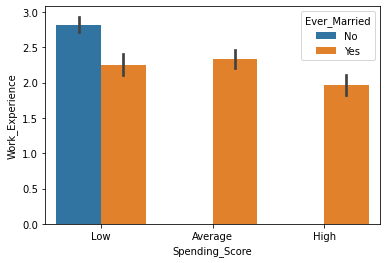

In [30]:
sns.barplot(x= df['Spending_Score'], y = df['Work_Experience'], hue = df['Ever_Married'])

In [31]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


# Data Preprocessing


**1. Feature Encoding**
* Since the Machine learning model accepts only Numerical values so the categorical variables which have 'object' data types are converted into numerical values depending upon the type of variable
   - *Ordinal Categorical variable* - Label Encoding
   - *Nominal Categorical Variable* - One Hot Encoding
-----------------------
**2. Feature Scaling**
* Features are scaled to give the good output for some algorithms which depends on some similiarty function like - 
      - K-Means Clustering algorithm
      - K-NN algorithm
      - Principal Component Analysis 

## Feature Encoding
* One Hot Encoding
* Label Encoding

In [32]:
df['Ever_Married']= df['Ever_Married'].replace({'No':0 , 'Yes':1})
df['Graduated']= df['Graduated'].replace({'No':0 , 'Yes':1})
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [33]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [34]:
# Replacing Cat_1 with 1, Cat_2 with 2, Cat_3 with 3, Cat4 with 4, Cat_5 with 5, Cat_6 with 6, and Cat_7 with 7 in Var_1 column
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [35]:
# Replacing Male with 0 and Female with 1 in Gender column
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [36]:
df['Profession'].value_counts()

Artist           2997
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64

In [37]:
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,
                                             'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [38]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,1,1.0,0,4.0,4
1,1,1,38,1,3,1.0,1,3.0,4
2,1,1,67,1,3,1.0,0,1.0,6
3,0,1,67,1,5,0.0,2,2.0,6
4,1,1,40,1,2,1.0,2,6.0,6


## Feature Scaling

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


# Applying Clustering Technique

### Elbow Method to obtain Optimal Number of Clusters

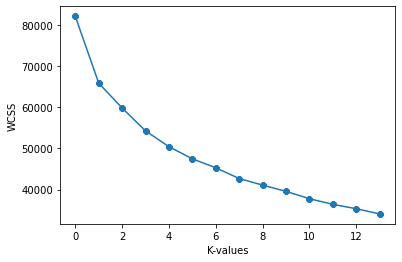

In [41]:
wcss = []
range_values = range(1,15)


for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(wcss, marker = '8')
plt.xlabel('K-values')
plt.ylabel('WCSS')
plt.show()

**We can take the k - value to be 4 or 5**

### Apply K-mean clustering algorithm considering k = 4

In [42]:
kmeans = KMeans(4, random_state = 42).fit(df_scaled)

In [43]:
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(4, 9)

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.300822,-1.166178,-0.347778,0.577608,-0.218778,0.329784,-0.729699,-0.568415,0.187922
1,-0.028047,-0.924983,-0.977192,-1.100655,0.011332,-0.067982,-0.657578,0.782035,-0.453011
2,-0.067949,0.836593,0.237183,0.538253,-0.644388,-0.053167,0.305178,-0.103964,0.083536
3,-0.159967,0.821308,1.001523,-0.239875,1.198242,-0.169166,0.934180,-0.105298,0.163331


In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [46]:
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.601434,0.014344,37.724898,0.906762,1.808914,3.539959,6.661338e-16,1.945697,5.418033
1,0.437768,0.133047,27.152122,0.095374,2.357654,2.242728,5.340963e-02,3.987601,4.508822
2,0.417910,1.000000,47.550941,0.887735,0.793965,2.291045,7.663855e-01,2.647956,5.269955
3,0.372116,0.992477,60.390171,0.511535,5.188064,1.912738,1.232197e+00,2.645938,5.383149


In [47]:
y_kmeans = kmeans.fit_predict(df_scaled)

In [48]:
df_cluster = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)

df_cluster.head(9)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,0,0,22,0,1,1.0,0,4.0,4,1
1,1,1,38,1,3,1.0,1,3.0,4,2
2,1,1,67,1,3,1.0,0,1.0,6,2
3,0,1,67,1,5,0.0,2,2.0,6,3
4,1,1,40,1,2,1.0,2,6.0,6,2
5,0,1,56,0,0,0.0,1,2.0,6,2
6,0,0,32,1,1,1.0,0,3.0,6,0
7,1,0,33,1,1,1.0,0,3.0,6,0
8,1,1,61,1,3,0.0,0,3.0,7,2


**Apply Principal Component Analysis (PCA) technique to perform dimensionality reduction and data visualization**

# Principal Component Analysis (PCA) technique

* To Perform Dimensionality Reduction
* Data Visualization

In [49]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-2.25066672,  1.18725021],
       [ 0.62433438,  0.19540444],
       [ 1.35713644, -1.47785023],
       ...,
       [ 1.46978324,  0.75076587],
       [-2.39242844,  1.24604064],
       [-2.38273198,  1.61847844]])

In [50]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.250667,1.187250
1,0.624334,0.195404
2,1.357136,-1.477850
3,2.897506,0.436680
4,1.215228,1.027937


In [51]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':labels})] ,axis=1)
pca_df.head()

,pca1,pca2,Cluster
0,-2.250667,1.187250,1
1,0.624334,0.195404,2
2,1.357136,-1.477850,2
3,2.897506,0.436680,3
4,1.215228,1.027937,2


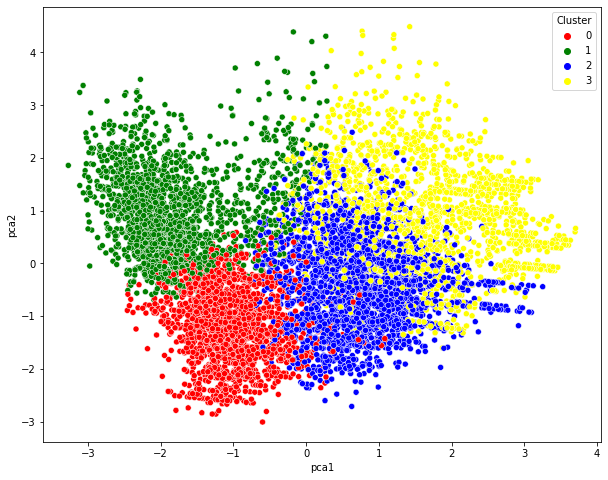

In [52]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df, palette = ['red','green','blue','yellow'])
plt.show()

---------------------------------------------

---------------------------------------

## Analysis of Clusters with help of EDA

In [53]:
df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,0,0,22,0,1,1.0,0,4.0,4,1
1,1,1,38,1,3,1.0,1,3.0,4,2
2,1,1,67,1,3,1.0,0,1.0,6,2
3,0,1,67,1,5,0.0,2,2.0,6,3
4,1,1,40,1,2,1.0,2,6.0,6,2


In [54]:
# Replacing 0 with Male and 1 with Female in Gender column
df_cluster['Gender'] = df_cluster['Gender'].replace({0:'Male', 1:'Female'})

In [55]:
df_cluster['Ever_Married'] = df_cluster['Ever_Married'].replace({0:'No', 1:'Yes'})
df_cluster['Graduated'] = df_cluster['Graduated'].replace({0:'No', 1:'Yes'})
df_cluster['Spending_Score'] = df_cluster['Spending_Score'].replace({0:'Low', 1:'Average', 2:'High'})
df_cluster['Profession'] = df_cluster['Profession'].replace({0:'Artist', 1:'Healthcare', 2:'Entertainment', 3:'Engineer',
                                             4:'Doctor', 5:'Lawyer', 6:'Executive', 7:'Marketing', 8:'Homemaker'})
df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,4,1
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,4,2
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,6,2
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,6,3
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,6,2


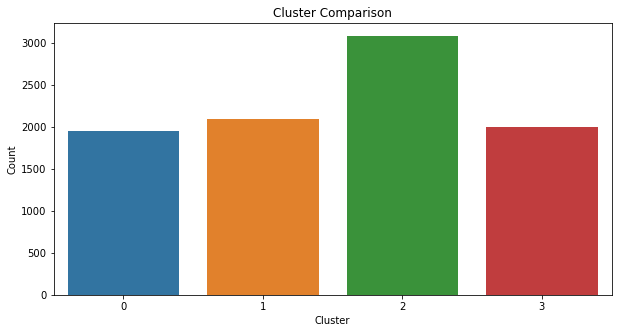

In [56]:
# Visualizing cluster Distribution

plt.subplots(figsize=(10,5))
sns.countplot(df_cluster['Cluster'].sort_values())
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Comparison')

plt.show()

In [57]:
# Customer Type Based On Gender

gender_based = pd.pivot_table(df_cluster, values='Age', index=['Gender'], columns=['Cluster'], aggfunc=np.count_nonzero)
gender_based

Cluster,0,1,2,3
Gender,,,,
Female,1174,918,1287,743
Male,778,1179,1793,1253


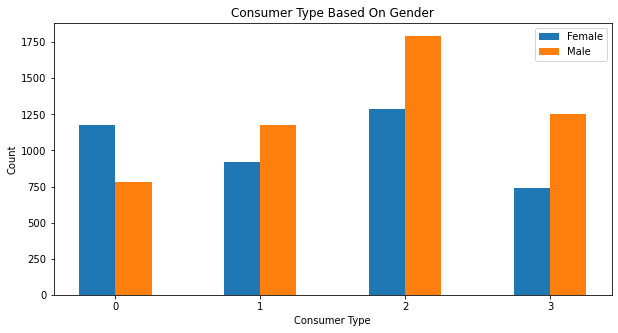

In [58]:
x = np.arange(len(gender_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize = (10,5))
for i in range(len(gender_based)):
    ax.bar(x + (i*width), gender_based.loc[gender_based.index[i]], width=width, label=gender_based.index[i])

ax.set_xticks(x + ((len(gender_based)/2-0.5)*width))
ax.set_xticklabels(gender_based.columns)

plt.title('Consumer Type Based On Gender')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc = 'best', frameon=True)
plt.show()

In [59]:
# Customer Type Based On Ever Married or not

married_based = pd.pivot_table(df_cluster, values='Age', index=['Ever_Married'], columns=['Cluster'], aggfunc=np.count_nonzero)
married_based

Cluster,0,1,2,3
Ever_Married,,,,
No,1924.0,1818.0,NaN,15.0
Yes,28.0,279.0,3080.0,1981.0


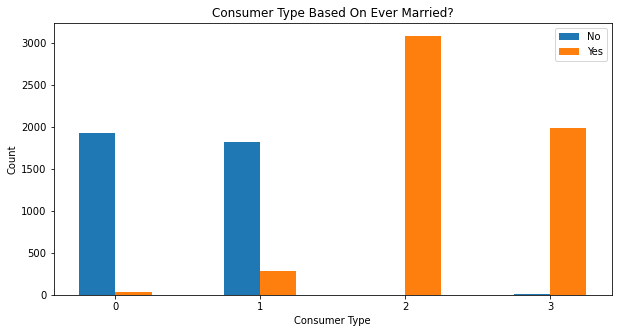

In [60]:
x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(married_based)):
    ax.bar(x+(i*width),married_based.loc[married_based.index[i]],width=width, label=married_based.index[i])

ax.set_xticks(x+((len(married_based)/2-0.5)*width))
ax.set_xticklabels(married_based.columns)

plt.title('Consumer Type Based On Ever Married?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

**Ever_Married - Married customers are usually in Cluster 2 or 3 while unmarried are in Cluster 0, 1**

In [61]:
# Customer Type Based On Age

age_based = pd.DataFrame(df_cluster.groupby('Cluster')['Age'].mean())
age_based

,Age
Cluster,
0,37.724898
1,27.152122
2,47.555844
3,60.369739


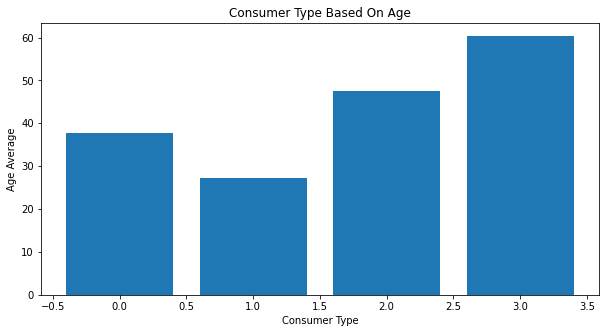

In [62]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['Age'])

plt.title('Consumer Type Based On Age')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Age Average')
plt.show()

**Age - <30 are in Cluster 1, 30-40 are in Cluster 0, 40-50 are in Cluster 2 while >50 are in Cluster 3**

In [63]:
# Customer Type Based On Have Been Graduated or not

grad_based = pd.pivot_table(df_cluster, values='Age',index=['Graduated'],columns=['Cluster'],aggfunc=np.count_nonzero)
grad_based

Cluster,0,1,2,3
Graduated,,,,
No,182,1897,345,975
Yes,1770,200,2735,1021


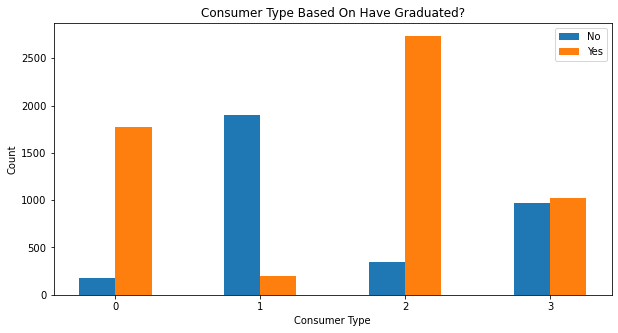

In [64]:
x = np.arange(len(grad_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(grad_based)):
    ax.bar(x+(i*width),grad_based.loc[grad_based.index[i]],width=width, label=grad_based.index[i])

ax.set_xticks(x+((len(grad_based)/2-0.5)*width))
ax.set_xticklabels(grad_based.columns)

plt.title('Consumer Type Based On Have Graduated?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

**Graduated - Graduated customers are usually in Cluster 0, 2, 3 while most Ungraduated are in Cluster 1**

In [65]:
# Customer Type Based On Profession

prof_based = pd.pivot_table(df_cluster,values='Age',index=['Profession'],columns=['Cluster'],aggfunc=np.count_nonzero)
prof_based

Cluster,0,1,2,3
Profession,,,,
Artist,766.0,163.0,2052.0,16.0
Doctor,201.0,257.0,159.0,169.0
Engineer,161.0,222.0,212.0,174.0
Entertainment,268.0,219.0,490.0,94.0
Executive,12.0,49.0,2.0,595.0
Healthcare,362.0,973.0,162.0,3.0
Homemaker,70.0,55.0,NaN,147.0
Lawyer,35.0,4.0,3.0,685.0
Marketing,77.0,155.0,NaN,113.0


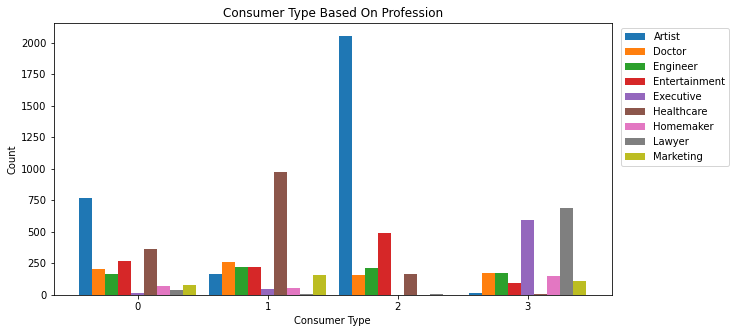

In [66]:
x = np.arange(len(prof_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(prof_based)):
    ax.bar(x+(i*width),prof_based.loc[prof_based.index[i]],width=width, label=prof_based.index[i])

ax.set_xticks(x+((len(prof_based)/2-0.5)*width))
ax.set_xticklabels(prof_based.columns)

plt.title('Consumer Type Based On Profession')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',bbox_to_anchor=(0.92,0.40,0.3,0.6),frameon=True)
plt.show()

**Profession - Customers in Artist & Entertainment are mostly in Cluster 2, Excecutive & Lawyer are mostly in Cluster 3, Healthcare & Doctors are mostly in Cluster 1**

In [67]:
# Customer Type Based On Work Experience

workexp_based = pd.DataFrame(df_cluster.groupby('Cluster')['Work_Experience'].mean())
workexp_based

,Work_Experience
Cluster,
0,3.539959
1,2.242728
2,2.290260
3,1.914329


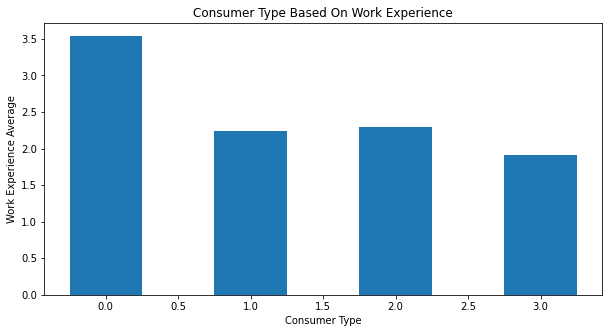

In [68]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(workexp_based.index,workexp_based['Work_Experience'],width=0.5)

plt.title('Consumer Type Based On Work Experience')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Work Experience Average')
plt.show()


**Work_Experience - <2 are in Cluster 3 while >2 are in Cluster 0, 1, 2**

In [69]:
# Customer Type Based On Spending Score

spend_based = pd.pivot_table(df_cluster,values='Work_Experience',index=['Spending_Score'],columns=['Cluster'],aggfunc=np.count_nonzero)
spend_based

Cluster,0,1,2,3
Spending_Score,,,,
Average,NaN,77.0,1184.0,315.0
High,NaN,10.0,254.0,691.0
Low,1492.0,1371.0,739.0,356.0


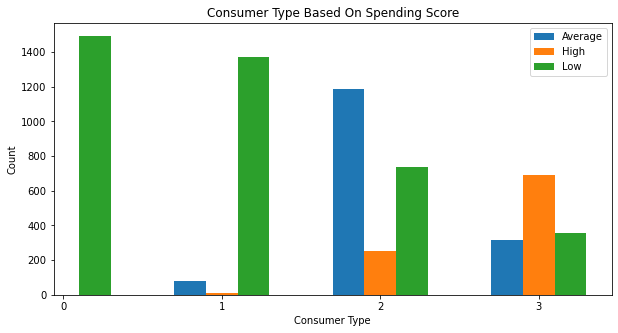

In [70]:
x = np.arange(len(spend_based.columns))
width = 0.2

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(spend_based)):
    ax.bar(x+(i*width),spend_based.loc[spend_based.index[i]],width=width, label=spend_based.index[i])

ax.set_xticks(x+((len(spend_based)/2-0.5)*width))
ax.set_xticklabels(spend_based.columns)

plt.title('Consumer Type Based On Spending Score')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

**Spending_Score - Usually 'Low' spenders are in Cluster 0 or 1 while 'high' and 'average' spenders are in Cluster 2 or 3**

In [71]:
# Customer Type Based On Family Size

famsize_based = pd.DataFrame(df_cluster.groupby('Cluster')['Family_Size'].agg(pd.Series.mode))
famsize_based

,Family_Size
Cluster,
0,1.0
1,4.0
2,2.0
3,2.0


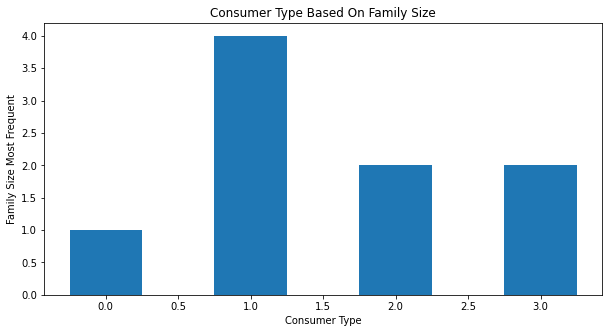

In [72]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(famsize_based.index,famsize_based['Family_Size'],width=0.5)

plt.title('Consumer Type Based On Family Size')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Family Size Most Frequent')
plt.show()

**Family_Size - <=1 are in Cluster 0, 1-3 are in Cluster 2, 3, and 4 in Cluster 1**